<a href="https://colab.research.google.com/github/eperezp2/HW1/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 1
Erick Perez Pereo
Student ID: 801119304
09/13/2023

Problem 1:

In [7]:
# HW !
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [84]:
# Load the dataset from Google Drive

url = 'https://raw.githubusercontent.com/eperezp2/HW1/main/D3.csv?token=GHSAT0AAAAAACHQKORGNDXJCTLUBULRSFQIZICIMVA'

df = pd.read_csv(url)
print(df.head())



         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


In [30]:
x1 = df.values[:, 0]  # 1st array
x2 = df.values[:, 1]  # 2nd array
x3 = df.values[:, 2]  # 3rd away
y = df.values[:, 3]  #4th away
m = len(y)  # Number of training examples


In [33]:
# Create a column vector of ones. This will be used as the "bias" term for the linear regression model.
x_0 = np.ones((m, 1))

# Reshape features (X) to make them 2D arrays suitable for matrix operations.
x_1 = x1.reshape(m, 1)
x_2 = x2.reshape(m, 1)
x_3 = x3.reshape(m, 1)

# Numpy hstack function stacks columns horizontally (builds a list of 1x2 arrays containing the values for x_0 and x_1)
x_1_data = np.hstack((x_0, x_1))
x_2_data = np.hstack((x_0, x_2))
x_3_data = np.hstack((x_0, x_3))

# Initialize iterations
iterations_1 = 1500

#Alphas
alpha_1_1 = 0.01
alpha_1_2 = 0.05
alpha_1_3 = 0.1

In [80]:
def compute_cost(X, y, theta):

    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [79]:
def gradient_descent(X, y, theta, alpha, iterations):

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history


In [85]:
# Calculate the theta and cost history values for each variable separately for the 3 variables
# X0 and X1
theta = np.zeros(2)
theta1_1, cost_history_1_1 = gradient_descent(x_1_data, y, theta, alpha_1_1, iterations_1) # For alpha = 0.01

theta = np.zeros(2)
theta1_2, cost_history_1_2 = gradient_descent(x_1_data, y, theta, alpha_1_2, iterations_1) # For alpha = 0.05

theta = np.zeros(2)
theta1_3, cost_history_1_3 = gradient_descent(x_1_data, y, theta, alpha_1_3, iterations_1) # For alpha = 0.1

# X0 and X2
theta = np.zeros(2)
theta2_1, cost_history_2_1 = gradient_descent(x_2_data, y, theta, alpha_1_1, iterations_1) # For alpha = 0.01

theta = np.zeros(2)
theta2_2, cost_history_2_2 = gradient_descent(x_2_data, y, theta, alpha_1_2, iterations_1) # For alpha = 0.05

theta = np.zeros(2)
theta2_3, cost_history_2_3 = gradient_descent(x_2_data, y, theta, alpha_1_3, iterations_1) # For alpha = 0.1

# X0 and X3
theta = np.zeros(2)
theta3_1, cost_history_3_1 = gradient_descent(x_3_data, y, theta, alpha_1_1, iterations_1) # For alpha = 0.01

theta = np.zeros(2)
theta3_2, cost_history_3_2 = gradient_descent(x_3_data, y, theta, alpha_1_2, iterations_1) # For alpha = 0.05

theta = np.zeros(2)
theta3_3, cost_history_3_3 = gradient_descent(x_3_data, y, theta, alpha_1_3, iterations_1) # For alpha = 0.1

<ipython-input-86-8f6f93f57524>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)


Text(0, 0.5, 'Loss')

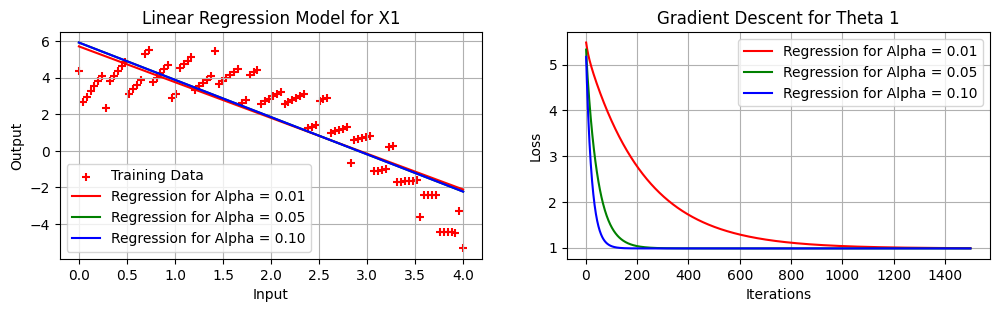

In [86]:
# @title
# Create the subplots layout
plt.subplots(1,1,figsize=(12,10))
# Linear Regression Plot for X1
plt.subplot(3,2,1)
plt.scatter(x_1_data[:, 1], y, color='red', marker='+', label='Training Data')
plt.plot(x_1_data[:, 1], x_1_data.dot(theta1_1), color='REd', label='Regression for Alpha = 0.01')
plt.plot(x_1_data[:, 1], x_1_data.dot(theta1_2), color='GReen', label='Regression for Alpha = 0.05')
plt.plot(x_1_data[:, 1], x_1_data.dot(theta1_3), color='Blue', label='Regression for Alpha = 0.10')

plt.grid(True)
plt.legend()
plt.title('Linear Regression Model for X1')
plt.xlabel('Input')
plt.ylabel('Output')

# Gradient Descent Plot for X1
plt.subplot(3,2,2)
plt.plot(range(1, iterations_1 + 1), cost_history_1_1, color='Red', label='Regression for Alpha = 0.01')
plt.plot(range(1, iterations_1 + 1), cost_history_1_2, color='Green', label='Regression for Alpha = 0.05')
plt.plot(range(1, iterations_1 + 1), cost_history_1_3, color='BLue', label='Regression for Alpha = 0.10')

plt.grid(True)
plt.legend()
plt.title('Gradient Descent for Theta 1')
plt.xlabel('Iterations')
plt.ylabel('Loss')




<ipython-input-77-000095ef093f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,3)


Text(0, 0.5, 'Loss')

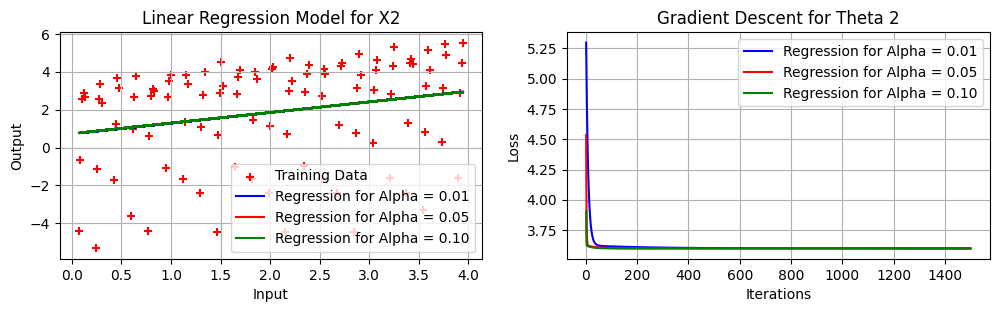

In [77]:
# Create the subplots layout
plt.subplots(1,1,figsize=(12,10))
# Linear Regression Plot for X2
plt.subplot(3,2,3)
plt.scatter(x_2_data[:, 1], y, color='red', marker='+', label='Training Data')
plt.plot(x_2_data[:, 1], x_2_data.dot(theta2_1), color='blue', label='Regression for Alpha = 0.01')
plt.plot(x_2_data[:, 1], x_2_data.dot(theta2_2), color='red', label='Regression for Alpha = 0.05')
plt.plot(x_2_data[:, 1], x_2_data.dot(theta2_3), color='green', label='Regression for Alpha = 0.10')

plt.grid(True)
plt.legend()
plt.title('Linear Regression Model for X2')
plt.xlabel('Input')
plt.ylabel('Output')


# Gradient Descent Plot for X2
plt.subplot(3,2,4)
plt.plot(range(1, iterations_1 + 1), cost_history_2_1, color='blue', label='Regression for Alpha = 0.01')
plt.plot(range(1, iterations_1 + 1), cost_history_2_2, color='red', label='Regression for Alpha = 0.05')
plt.plot(range(1, iterations_1 + 1), cost_history_2_3, color='green', label='Regression for Alpha = 0.10')

plt.grid(True)
plt.legend()
plt.title('Gradient Descent for Theta 2')
plt.xlabel('Iterations')
plt.ylabel('Loss')


<ipython-input-78-2d5b8aba22f1>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,5)


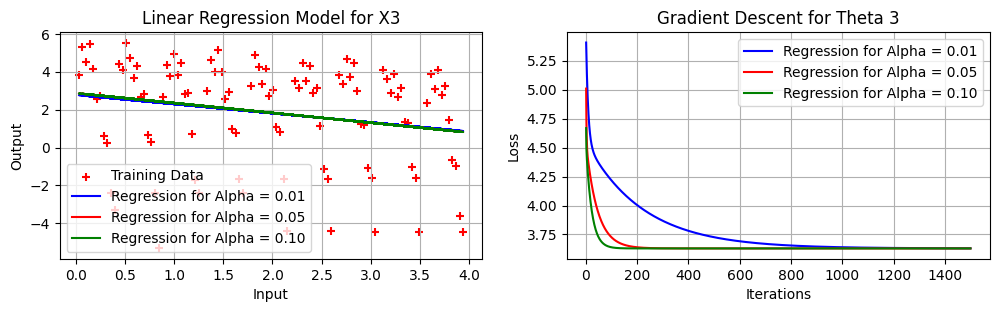

In [78]:
# Create the subplots layout
plt.subplots(1,1,figsize=(12,10))
# Linear Regression Plot for X3
plt.subplot(3,2,5)
plt.scatter(x_3_data[:, 1], y, color='red', marker='+', label='Training Data')
plt.plot(x_3_data[:, 1], x_3_data.dot(theta3_1), color='blue', label='Regression for Alpha = 0.01')
plt.plot(x_3_data[:, 1], x_3_data.dot(theta3_2), color='red', label='Regression for Alpha = 0.05')
plt.plot(x_3_data[:, 1], x_3_data.dot(theta3_3), color='green', label='Regression for Alpha = 0.10')

plt.grid(True)
plt.legend()
plt.title('Linear Regression Model for X3')
plt.xlabel('Input')
plt.ylabel('Output')

# Gradient Descent Plot for X3
plt.subplot(3,2,6)
plt.plot(range(1, iterations_1 + 1), cost_history_3_1, color='blue', label='Regression for Alpha = 0.01')
plt.plot(range(1, iterations_1 + 1), cost_history_3_2, color='red', label='Regression for Alpha = 0.05')
plt.plot(range(1, iterations_1 + 1), cost_history_3_3, color='green', label='Regression for Alpha = 0.10')

plt.grid(True)
plt.legend()
plt.title('Gradient Descent for Theta 3')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.show()

In [50]:
# Cost for alpha = 0.01 -> get the last value of the cost history
x1_1_cost = cost_history_1_1[-1]
x2_1_cost = cost_history_2_1[-1]
x3_1_cost = cost_history_3_1[-1]

# Cost for alpha = 0.05 -> get the last value of the cost history
x1_2_cost = cost_history_1_2[-1]
x2_2_cost = cost_history_2_2[-1]
x3_2_cost = cost_history_3_2[-1]

# Cost for alpha = 0.1 -> get the last value of the cost history
x1_3_cost = cost_history_1_3[-1]
x2_3_cost = cost_history_2_3[-1]
x3_3_cost = cost_history_3_3[-1]

print("Costs for alpha = 0.01")
print("X1: ", x1_1_cost)
print("X2: ", x2_1_cost)
print("X3: ", x3_1_cost)

print("\nCosts for alpha = 0.05")
print("X1: ", x1_2_cost)
print("X2: ", x2_2_cost)
print("X3: ", x3_2_cost)

print("\nCosts for alpha = 0.10")
print("X1: ", x1_3_cost)
print("X2: ", x2_3_cost)
print("X3: ", x3_3_cost)

Costs for alpha = 0.01
X1:  0.9905894438682062
X2:  3.5993993982305357
X3:  3.6305262475389664

Costs for alpha = 0.05
X1:  0.9849930825406077
X2:  3.5993660181680425
X3:  3.629451124607917

Costs for alpha = 0.10
X1:  0.9849930825405946
X2:  3.599366018168041
X3:  3.6294511246079155


Problem 2:

In [81]:
#builds a list of 1x2 arrays containing the values for x_0, x_1, x_2, and x_3
total_data = np.hstack((x_0, x_1, x_2, x_3))

# Initialize iterations
iterations_2 = 1500
#Alpha
alpha_2_1 = 0.01
alpha_2_2 = 0.05
alpha_2_3 = 0.1

In [82]:
#Calculate theta and cost history
theta = np.zeros(4)
total_theta_1, total_cost_history_1 = gradient_descent(total_data, y, theta, alpha_2_1, iterations_2)

theta = np.zeros(4)
total_theta_2, total_cost_history_2 = gradient_descent(total_data, y, theta, alpha_2_2, iterations_2)

theta = np.zeros(4)
total_theta_3, total_cost_history_3 = gradient_descent(total_data, y, theta, alpha_2_3, iterations_2)

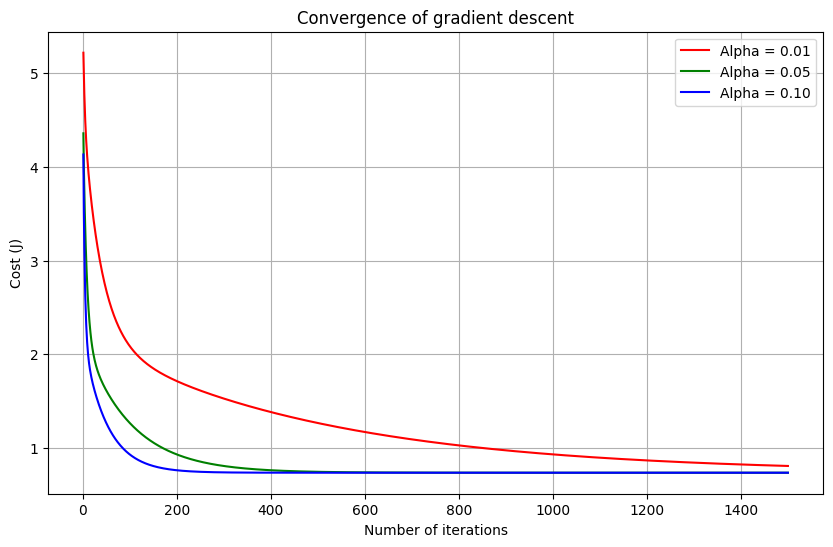

In [59]:
plt.plot(range(1, iterations_2 + 1), total_cost_history_1, color='red', label = 'Alpha = 0.01')
plt.plot(range(1, iterations_2 + 1), total_cost_history_2, color='green', label = 'Alpha = 0.05')
plt.plot(range(1, iterations_2 + 1), total_cost_history_3, color='blue', label = 'Alpha = 0.10')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.legend()
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

In [55]:
def predict_value(x_in, theta_in):

    y = theta_in[0]
    for x_val, theta_val in zip(x_in, theta_in[1:]):
      y += x_val * theta_val

    return y

In [57]:
# Cost for alpha = 0.01 -> get the last value of the cost history
total_cost_1 = total_cost_history_1[-1]
total_cost_2 = total_cost_history_2[-1]
total_cost_3 = total_cost_history_3[-1]

print("Cost for alpha = 0.01: ", total_cost_1)
print("Cost for alpha = 0.05: ", total_cost_2)
print("Cost for alpha = 0.10: ", total_cost_3)

Cost for alpha = 0.01:  0.8105104429083866
Cost for alpha = 0.05:  0.7384646851794184
Cost for alpha = 0.10:  0.7384642415684215


In [58]:
# Initialize the values
values_1 = [1,1,1]
values_2 = [2,0,4]
values_3 = [3,2,1]

# Predict the values
y1 = predict_value(values_1, total_theta_2)
y2 = predict_value(values_2, total_theta_2)
y3 = predict_value(values_3, total_theta_2)

print(total_theta_2)

print("The predicted value for the first set of x values: ", y1)
print("The predicted value for the first set of x values: ", y2)
print("The predicted value for the first set of x values: ", y3)


[ 5.31128136 -2.0033116   0.5330402  -0.26517886]
The predicted value for the first set of x values:  3.5758310955346353
The predicted value for the first set of x values:  0.24394270393310014
The predicted value for the first set of x values:  0.10224809362461512
